# 生成配送中心以及卸货点的位置图像

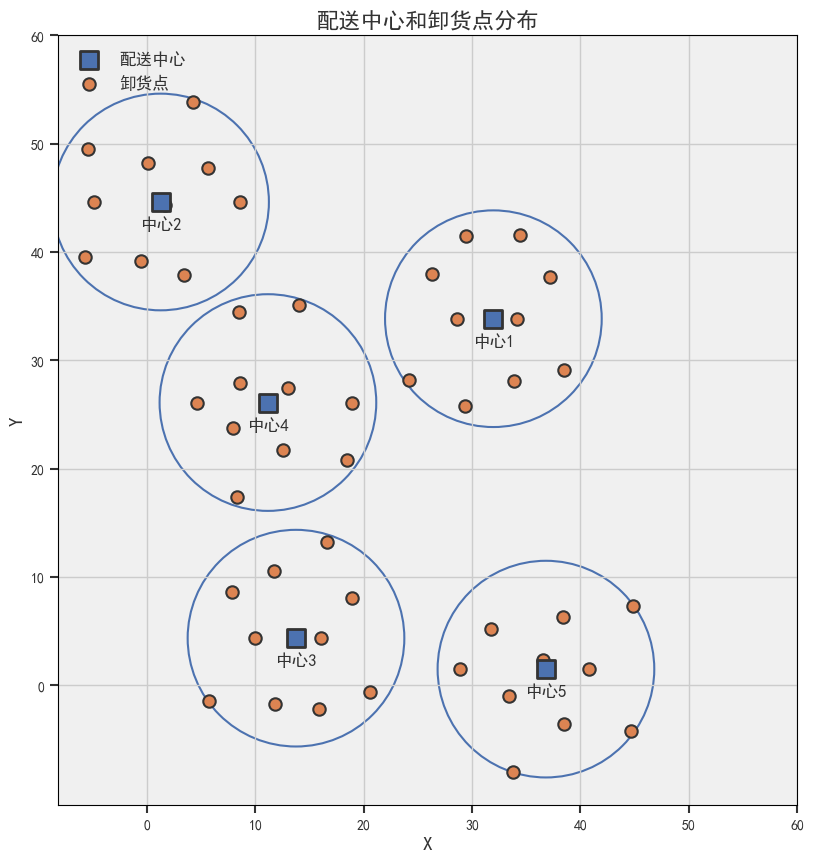

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

plt.rcParams['font.family'] = 'SimHei'

# 设置随机种子
random.seed(42)

# 定义配送中心数量和每个中心的卸货点数量
num_centers = 5
num_unloading_points_per_center = 10

# 定义配送中心和卸货点类
class DeliveryCenter:
    def __init__(self, x, y, index):
        self.location = (x, y)
        self.index = index
        self.drones = []
        self.pending_orders = []  # 存储待处理订单
        self.total_distance = 0  # 初始化总配送距离

class UnloadingPoint:
    def __init__(self, x, y, index):
        self.location = (x, y)
        self.orders = []
        self.index = index

class Order:
    def __init__(self, unloading_point, timestamp, priority):
        self.unloading_point = unloading_point
        self.timestamp = timestamp
        self.priority = priority
        if priority == '紧急':
            self.deadline = timestamp + 0.5
        elif priority == '较紧急':
            self.deadline = timestamp + 1.5
        else:
            self.deadline = timestamp + 3
            
            
# 生成配送中心和卸货点的坐标
center_x = [random.uniform(0, 50) for _ in range(num_centers)]
center_y = [random.uniform(0, 50) for _ in range(num_centers)]
# center_x[0] += 15
# center_x[3] += 15
center_y[3] += 5
# center_x[1] += 25
# center_y[2] -= 4
unloading_x = []
unloading_y = []

# 生成 DeliveryCenter 和 UnloadingPoint 实例
unloading_points = []
delivery_centers = [DeliveryCenter(center_x[i], center_y[i], i) for i in range(num_centers)]
index = 0
for i in range(num_centers):
    radius = 10  # 配送中心的半径
    existing_points = []
    for j in range(num_unloading_points_per_center):
        while True:
            angle = 2 * j * math.pi / num_unloading_points_per_center
            distance = random.uniform(0, radius)
            x = center_x[i] + distance * math.cos(angle)
            y = center_y[i] + distance * math.sin(angle)
            # 检查新生成的卸货点与该中心已有卸货点之间的最小距离是否大于等于4
            min_distance = float('inf')
            for ex_x, ex_y in existing_points:
                distance = ((x - ex_x) ** 2 + (y - ex_y) ** 2) ** 0.5
                min_distance = min(min_distance, distance)
            if min_distance >= 4:
                unloading_x.append(x)
                unloading_y.append(y)
                existing_points.append((x, y))
                unloading_points.append(UnloadingPoint(x, y, index))
                index += 1
                break


# 绘制配送中心和卸货点
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter([c.location[0] for c in delivery_centers], [c.location[1] for c in delivery_centers], 
           color='#4C72B0', marker='s', s=150, linewidths=2, edgecolors='#333333', 
           facecolor='#4C72B0', label='配送中心', zorder=3)
ax.scatter([p.location[0] for p in unloading_points], [p.location[1] for p in unloading_points],
           color='#DD8452', s=80, linewidths=1.5, edgecolors='#333333',
           facecolor='#DD8452', label='卸货点', zorder=2)

# 绘制配送中心的半径
for c in delivery_centers:
    circle = plt.Circle(c.location, radius, fill=False, color='#4C72B0', linewidth=1.5)
    ax.add_artist(circle)
    ax.text(c.location[0], c.location[1]-2, f'中心{delivery_centers.index(c)+1}', 
            ha='center', va='center', fontsize=12, color='#333333', zorder=4)

# 添加图例、标题和坐标轴标签
legend = ax.legend(loc='upper left', fontsize=12, frameon=False)
for text in legend.get_texts():
    text.set_color('#333333')
ax.set_title('配送中心和卸货点分布', fontsize=16, color='#333333')
ax.set_xlabel('X', fontsize=14, color='#333333')
ax.set_ylabel('Y', fontsize=14, color='#333333')
ax.set_aspect('equal')
ax.grid(True, color='#CCCCCC', linestyle='-', linewidth=1)
ax.set_facecolor('#F0F0F0')
ax.tick_params(axis='both', which='major', colors='#333333', length=6, width=1.5)
ax.tick_params(axis='both', which='minor', colors='#333333', length=4, width=1)
ax.set_xticks(np.arange(0, 61, 10))
ax.set_yticks(np.arange(0, 61, 10))

plt.show()

# 订单生成

In [3]:
import random

# 订单生成函数
def generate_orders(unloading_points, start_time=0, end_time=8, interval=0.5):
    current_time = start_time
    while current_time < end_time:
        for point in unloading_points:
            num_orders = random.randint(0, 5)  # 每个卸货点每次生成0-3个订单
            for _ in range(num_orders):
                priority = random.choices(['紧急', '较紧急', '一般'], [0.2, 0.3, 0.5])[0]
                order = Order(point, current_time, priority)
                point.orders.append(order)
        current_time += interval

# 调用订单生成函数
generate_orders(unloading_points)

# 检查生成的订单
order_count = 0
for i, point in enumerate(unloading_points):
    print(f"卸货点 {i+1} 的订单:")
    order_count += len(point.orders)
    for order in point.orders:
        print(f"  - 优先级: {order.priority}, 生成时间: {order.timestamp:.2f}时, 截至时间: {order.deadline:.2f}时")

print(f"订单总数:{order_count}")

卸货点 1 的订单:
  - 优先级: 一般, 生成时间: 0.50时, 截至时间: 3.50时
  - 优先级: 较紧急, 生成时间: 0.50时, 截至时间: 2.00时
  - 优先级: 一般, 生成时间: 0.50时, 截至时间: 3.50时
  - 优先级: 一般, 生成时间: 0.50时, 截至时间: 3.50时
  - 优先级: 紧急, 生成时间: 0.50时, 截至时间: 1.00时
  - 优先级: 一般, 生成时间: 1.00时, 截至时间: 4.00时
  - 优先级: 紧急, 生成时间: 1.00时, 截至时间: 1.50时
  - 优先级: 较紧急, 生成时间: 1.00时, 截至时间: 2.50时
  - 优先级: 一般, 生成时间: 1.00时, 截至时间: 4.00时
  - 优先级: 较紧急, 生成时间: 1.50时, 截至时间: 3.00时
  - 优先级: 一般, 生成时间: 1.50时, 截至时间: 4.50时
  - 优先级: 一般, 生成时间: 2.00时, 截至时间: 5.00时
  - 优先级: 一般, 生成时间: 2.00时, 截至时间: 5.00时
  - 优先级: 较紧急, 生成时间: 2.00时, 截至时间: 3.50时
  - 优先级: 较紧急, 生成时间: 2.50时, 截至时间: 4.00时
  - 优先级: 紧急, 生成时间: 3.00时, 截至时间: 3.50时
  - 优先级: 一般, 生成时间: 3.00时, 截至时间: 6.00时
  - 优先级: 紧急, 生成时间: 3.00时, 截至时间: 3.50时
  - 优先级: 一般, 生成时间: 3.50时, 截至时间: 6.50时
  - 优先级: 较紧急, 生成时间: 3.50时, 截至时间: 5.00时
  - 优先级: 一般, 生成时间: 4.00时, 截至时间: 7.00时
  - 优先级: 一般, 生成时间: 4.50时, 截至时间: 7.50时
  - 优先级: 一般, 生成时间: 4.50时, 截至时间: 7.50时
  - 优先级: 一般, 生成时间: 4.50时, 截至时间: 7.50时
  - 优先级: 一般, 生成时间: 4.50时, 截至时间: 7.50时
  - 优先级: 紧急, 生成时间: 4.50时, 截至时间: 5

In [4]:
# 计算距离函数
def calculate_distance(loc1, loc2):
    return ((loc1[0] - loc2[0]) ** 2 + (loc1[1] - loc2[1]) ** 2) ** 0.5

# 路径规划（贪婪算法）
def plan_path(center, orders, center_index, current_time, max_distance=20, max_items=5):
    path = []
    path_ids = [f"配送中心{center_index+1}"]
    remaining_orders = [order for order in orders if order.timestamp <= current_time]
    current_location = center.location
    current_load = 0
    current_distance = 0
    total_time = current_time
    # 记录开始时间
    start_time = total_time  
    while remaining_orders and current_load < max_items:
        # 按截止时间和距离排序
        remaining_orders.sort(key=lambda o: (o.deadline, calculate_distance(current_location, o.unloading_point.location)))
        for order in remaining_orders:
            next_distance = calculate_distance(current_location, order.unloading_point.location)
            return_distance = calculate_distance(order.unloading_point.location, center.location)
            total_distance = current_distance + next_distance + return_distance
            if total_distance <= max_distance and (total_time + next_distance / 60) <= order.deadline:
                path.append(order)
                path_ids.append(f"卸货点{order.unloading_point.index + 1}")
                current_location = order.unloading_point.location
                current_distance += next_distance
                current_load += 1
                total_time += next_distance / 60  # 时间增加，单位小时
                remaining_orders.remove(order)
                break
        else:
            break
    # 回到配送中心
    if path:
        current_distance += calculate_distance(current_location, center.location)
    path_ids.append(f"配送中心{center_index+1}")
    # 记录总配送距离
    total_distance = current_distance
    return path, path_ids, start_time, total_distance ,(len(path_ids)-2) # 返回路径、路径编号、开始时间和总配送距离

# 调度策略
def dispatch_drones(delivery_centers, unloading_points, max_distance=20, max_items=5, buffer_time=0.5):
    total_orders = 0
    current_time = 0
    interval = 0.5
    # 记录已处理订单的集合
    processed_orders = set()
    # 记录每个配送中心每个时间阶段配送的订单数目
    orders_per_center_per_interval = {i: {} for i in range(len(delivery_centers))}
    
    while current_time < 24:
        for center_index, center in enumerate(delivery_centers):
            # 获取该中心覆盖范围内的新订单
            new_orders = [order for point in unloading_points for order in point.orders
                          if calculate_distance(center.location, point.location) <= radius
                          and order.timestamp <= current_time
                          and order not in processed_orders]
            # 更新待处理订单
            center.pending_orders.extend(new_orders)
            processed_orders.update(new_orders)
            # 临时缓冲区订单
            buffer_orders = [order for order in center.pending_orders if order.deadline - current_time > buffer_time]
            immediate_orders = [order for order in center.pending_orders if order not in buffer_orders]
            orders_this_interval = 0
            
            while immediate_orders:
                path, path_ids, start_time, total_distance, order_count = plan_path(center, immediate_orders + buffer_orders, center_index, current_time, max_distance, max_items)
                if not path:
                    break
                center.drones.append((path, path_ids, start_time, total_distance))
                for order in path:
                    if order in immediate_orders:
                        immediate_orders.remove(order)
                    elif order in buffer_orders:
                        buffer_orders.remove(order)
                    center.pending_orders.remove(order)
                center.total_distance += total_distance  # 累积总配送距离
                total_orders += order_count  # 累积总订单数量
                orders_this_interval += order_count
            
            # 记录当前时间阶段的订单数量
            orders_per_center_per_interval[center_index][current_time] = orders_this_interval
            
            # 将剩余订单累积到下一个时间段处理
            center.pending_orders = buffer_orders
        
        current_time += interval
    
    print(f"总配送订单数量: {total_orders}")
    # for center_index, intervals in orders_per_center_per_interval.items():
    #     print(f"配送中心 {center_index + 1} 每个时间阶段的配送订单数目:")
    #     for interval_time, orders_count in intervals.items():
    #         if order_count > 0:
    #             print(f"  - 时间: {interval_time}小时, 订单数目: {orders_count}")

# 调用调度函数
dispatch_drones(delivery_centers, unloading_points)

# 检查生成的订单和路径规划
for i, center in enumerate(delivery_centers):
    print(f"配送中心 {i+1} 的路径规划:")
    for j, (path, path_ids, start_time, total_distance) in enumerate(center.drones):
        unique_locations = []
        for loc in path_ids:
            if loc not in unique_locations:
                unique_locations.append(loc)
        unique_locations.append(unique_locations[0])
        locations_str = ' -> '.join(unique_locations)
        print(f"  无人机 {j+1}: {locations_str}")
        print(f"    - 开始时间: {start_time:.2f}小时, 总距离: {total_distance:.2f}公里")
        for order in path:
            print(f"    - 优先级: {order.priority}, 卸货点: {order.unloading_point.index + 1}, 生成时间: {order.timestamp:.2f}小时, 截止时间: {order.deadline:.2f}小时")
#     # print(f"配送中心 {i+1} 的总配送距离: {center.total_distance:.2f}公里")
# 
# for i, center in enumerate(delivery_centers):
#     print(f"配送中心 {i+1} 的总配送距离: {center.total_distance:.2f}公里")



总配送订单数量: 2039
配送中心 1 的路径规划:
  无人机 1: 配送中心1 -> 卸货点6 -> 卸货点5 -> 配送中心1
    - 开始时间: 0.00小时, 总距离: 16.16公里
    - 优先级: 紧急, 卸货点: 6, 生成时间: 0.00小时, 截止时间: 0.50小时
    - 优先级: 紧急, 卸货点: 5, 生成时间: 0.00小时, 截止时间: 0.50小时
    - 优先级: 较紧急, 卸货点: 5, 生成时间: 0.00小时, 截止时间: 1.50小时
    - 优先级: 较紧急, 卸货点: 6, 生成时间: 0.00小时, 截止时间: 1.50小时
    - 优先级: 一般, 卸货点: 6, 生成时间: 0.00小时, 截止时间: 3.00小时
  无人机 2: 配送中心1 -> 卸货点10 -> 卸货点9 -> 配送中心1
    - 开始时间: 0.00小时, 总距离: 18.88公里
    - 优先级: 紧急, 卸货点: 10, 生成时间: 0.00小时, 截止时间: 0.50小时
    - 优先级: 紧急, 卸货点: 10, 生成时间: 0.00小时, 截止时间: 0.50小时
    - 优先级: 较紧急, 卸货点: 10, 生成时间: 0.00小时, 截止时间: 1.50小时
    - 优先级: 较紧急, 卸货点: 9, 生成时间: 0.00小时, 截止时间: 1.50小时
    - 优先级: 较紧急, 卸货点: 9, 生成时间: 0.00小时, 截止时间: 1.50小时
  无人机 3: 配送中心1 -> 卸货点8 -> 卸货点6 -> 配送中心1
    - 开始时间: 0.00小时, 总距离: 19.98公里
    - 优先级: 紧急, 卸货点: 8, 生成时间: 0.00小时, 截止时间: 0.50小时
    - 优先级: 一般, 卸货点: 8, 生成时间: 0.00小时, 截止时间: 3.00小时
    - 优先级: 一般, 卸货点: 8, 生成时间: 0.00小时, 截止时间: 3.00小时
    - 优先级: 一般, 卸货点: 6, 生成时间: 0.00小时, 截止时间: 3.00小时
    - 优先级: 一般, 卸货点: 6, 生成时间: 0.00小时, 截止时间: 3

In [5]:
total_distance = 0
print(f"订单总数:{order_count}")
center_order_count = [0 for _ in range(len(delivery_centers))]
order_count_ = 0
for i, point in enumerate(unloading_points):
    order_count_ += len(point.orders)
    center_order_count[int(i/10)] += len(point.orders) 
# print(f"订单总数:{order_count_}")
# print(center_order_count)

for i, center in enumerate(delivery_centers):
    print(f"配送中心 {i+1} 需要配送订单的总数为{center_order_count[i]}, 总配送距离为: {center.total_distance:.2f}公里")
    total_distance += center.total_distance
    
print(f"总配送距离: {total_distance:.2f}公里")

订单总数:2039
配送中心 1 需要配送订单的总数为431, 总配送距离为: 1591.60公里
配送中心 2 需要配送订单的总数为402, 总配送距离为: 1396.88公里
配送中心 3 需要配送订单的总数为372, 总配送距离为: 1388.69公里
配送中心 4 需要配送订单的总数为414, 总配送距离为: 1478.17公里
配送中心 5 需要配送订单的总数为420, 总配送距离为: 1472.88公里
总配送距离: 7328.21公里


In [6]:
print(len(delivery_centers[0].pending_orders))
print(len(delivery_centers[1].pending_orders))
print(len(delivery_centers[2].pending_orders))
print(len(delivery_centers[3].pending_orders))
print(len(delivery_centers[4].pending_orders))

0
0
0
0
0
